# Tunning Your Model
As a Data Scientist you need to be able to tune your model to make sure it is predicting as accurately as possible and doing it as fast as possible. There are a couple of parameters that you will have the opportunity to tweak for the Gradient Descent Optimizer.
> **Learning Rate** - Determines how fast your model will learn. The higher the number the faster it will learn.

* If you make the LR too high, your model might osilate between the same two values but never hit the local minimum (or the answer)
* If you make the LR too small, you might need significant more iterations to get to the local minimum
* Typical LR range: [0.001 - 1]

The goal is to choose the highest learning rate that will get you the local minimum with as few iterations as possible.

> **Iterations** - Determines the number of iterations you are going to run your model for. You may also hear this referred to as an epoch.

Consider plotting the error output against the number of iterations.
* Make sure the error it is decreasing in a consistent manner and decreasing after every iteration
* A flat line could mean you have found your answer

How many iterations are recommended?
* Depends on the problem, it could be a few, it could be many.

In [35]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import math
%matplotlib inline
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.3 | packaged by conda-forge | (default, Feb 10 2017, 07:09:50) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
Tensorflow version 1.0.1
Pandas version 0.19.2
Numpy version 1.12.0


In [36]:
train_x = np.random.rand(100).astype(np.float32)

In [37]:
train_y = 0.1*train_x+0.3

In [38]:
lr = 0.2

x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = W*x + b

loss = tf.reduce_mean(tf.square(train_y-pred))
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [39]:
correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [42]:
t=[]

# initialize the variables
init = tf.global_variables_initializer()

# run graph
with tf.Session() as sess:
    sess.run(init)
    
    # fit the function
    for step in range(200):
        # get the data
        train_data = {x:train_x, y:train_y}
        sess.run(train, feed_dict=train_data)
        t.append((step, sess.run(loss, feed_dict=train_data)))
        print('Accuracy on train set - {0}: '.format([step]), sess.run(accuracy, feed_dict=train_data))
    


Accuracy on train set - [0]:  0.13
Accuracy on train set - [1]:  0.44
Accuracy on train set - [2]:  0.61
Accuracy on train set - [3]:  0.68
Accuracy on train set - [4]:  0.74
Accuracy on train set - [5]:  0.77
Accuracy on train set - [6]:  0.79
Accuracy on train set - [7]:  0.81
Accuracy on train set - [8]:  0.81
Accuracy on train set - [9]:  0.85
Accuracy on train set - [10]:  0.87
Accuracy on train set - [11]:  0.88
Accuracy on train set - [12]:  0.91
Accuracy on train set - [13]:  0.91
Accuracy on train set - [14]:  0.92
Accuracy on train set - [15]:  0.93
Accuracy on train set - [16]:  0.93
Accuracy on train set - [17]:  0.93
Accuracy on train set - [18]:  0.93
Accuracy on train set - [19]:  0.94
Accuracy on train set - [20]:  0.94
Accuracy on train set - [21]:  0.94
Accuracy on train set - [22]:  0.96
Accuracy on train set - [23]:  0.97
Accuracy on train set - [24]:  0.98
Accuracy on train set - [25]:  0.98
Accuracy on train set - [26]:  1.0
Accuracy on train set - [27]:  1.0
Accu

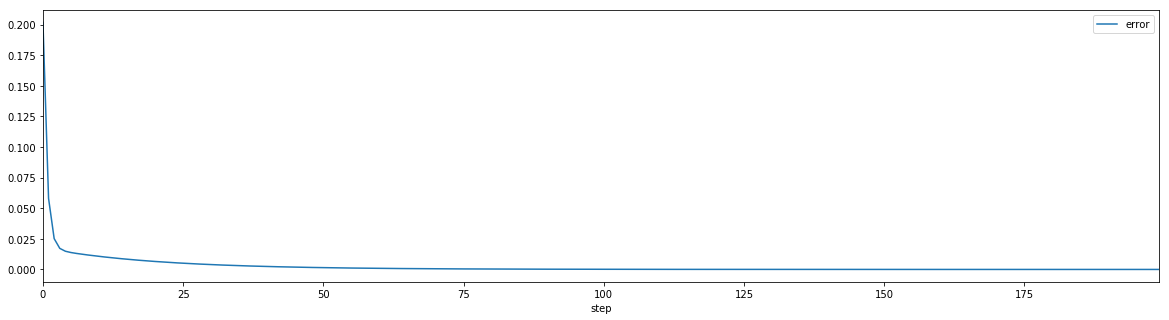

In [41]:
pd.DataFrame(t, columns=['step', 'error']).plot(x='step', y='error', figsize=(20,5))